# 447 Fa19 final exam 10:30--12:20p Thu Dec 12

***Notes regarding regrade requests:***

* ***I will accept regrade requests until midnight (11:59p) Mon Dec 16*** -- I have to submit grades on Tue Dec 17.
* To request a regrade, send me a message using Canvas Conversations with a short explanation of which problem(s) you want regarded, and why you think your solution is equivalent to or equally valid as the one provided.
* ***Note that it is possible your score will decrease after the regrade***, so please be sure you understand the problem and solution before making a request.  To help you understand the problems and their solutions before you submit your request, I am happy to answer questions during office hours.

5.0 <= scores <= 10.0
median score = 8.5


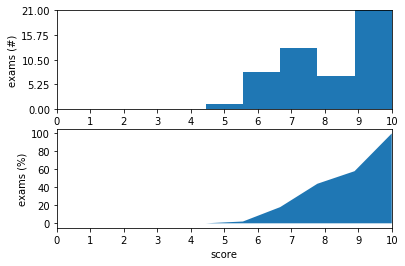

In [15]:
import numpy as np
import pylab as plt

scores = np.asarray([5.0, 5.75, 6.0, 6.25, 6.25, 6.5, 6.5, 6.5, 6.5, 6.75, 6.75, 6.75, 7.0, 7.25, 7.5, 7.5, 7.5, 7.5, 7.5, 7.75, 7.75, 7.75, 8.0, 8.0, 8.5, 8.5, 8.75, 8.75, 8.75, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.5, 9.5, 9.5, 9.5, 9.5, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 9.75, 10.0, 10.0, 10.0])

print('%0.1f <= scores <= %0.1f'%(scores.min(),scores.max()))
print('median score = %0.1f'%np.median(scores))

xlim = (0,10)

plt.figure()
plt.subplot(2,1,1)
h = plt.hist(scores,bins=np.linspace(xlim[0],xlim[1],np.diff(xlim)))
n,s = h[0],h[1]
N = int(np.ceil(h[0].max()))
plt.ylim(0,N)
plt.xticks(np.linspace(xlim[0],xlim[1],np.diff(xlim)+1))
plt.yticks(np.linspace(0,N,(N+2)/4))
plt.xlim(xlim)
plt.ylabel('exams (#)');

plt.subplot(2,1,2)
n *= 100./n.sum()
n = np.hstack((0.,n))
plt.fill_between(s,np.cumsum(n),0*n)
plt.xlim(xlim)
plt.xticks(np.linspace(xlim[0],xlim[1],np.diff(xlim)+1))
plt.yticks(np.linspace(0,100,6))
plt.xlabel('score'); plt.ylabel('exams (%)');

# problem (1.)

Translate the following model into state-space form using $3$-dimensional state vector $x = (q,\dot{q},\ell)\in\mathbb{R}^3$ and linearize about the origin,

$$ m\ddot{q} = \kappa (\ell - 2q) + \mu (\ell - 2q)^2 + u,\ \beta\dot{\ell} = -\kappa (\ell - q) - \alpha \cos(\ell - q), $$

i.e. determine function $f$ and matrices $A,B$ such that $\dot{x} = f(x,u) \approx A x + B u$ near $x_e = 0$, $u_e = 0$.

# solution 

Dividing through by $m$ and $\beta$, we obtain that:

$$\fbox{$f(x,u) = \dot{x}=\left[\begin{matrix} \dot{q} \\ \ddot{q} \\ \dot{\ell} \end{matrix}\right]=\left[\begin{matrix} \dot{q} \\ \frac{1}{m}(\kappa(\ell-2q)+\mu(\ell-2q)^2+u) \\ \frac{1}{\beta}(\kappa(\ell-q)-\alpha\cos(\ell-q))\end{matrix}\right]$}$$

To obtain matrices $A, B$, we can compute the Jacobians $A=\frac{df}{dx}, B=\frac{df}{du}$ and evaluate at the equilibrium point $(0,0,0)$ to obtain

$$\fbox{$A=\left[\begin{matrix} 0 & 1 & 0 \\ \frac{-2\kappa}{m} & 0 & \frac{\kappa}{m} \\ \frac{\kappa}{\beta} & 0 & \frac{-\kappa}{\beta} \end{matrix}\right], B=\left[\begin{matrix} 0 \\ \frac{1}{m} \\ 0 \end{matrix}\right]$}$$

Notes:
* 0.25 points earned for correct NL equation $f$
* 0.25 points earned for correct $B$
* 0 to 0.5 points earned for correctly computing Jacobian and plugging in equilibrium point for $A$ 

# problem (2.)

Consider the following LTI system with an output,

$$ \dot{x} = A x = \left[ \begin{array}{ccc} -a_1 & 1 & 0 \\ -a_2 & 0 & 1 \\ -a_3 & 0 & 0 \end{array} \right] x,\ y = C x = \left[ \begin{array}{ccc} 1 & 0 & 0 \end{array} \right]. $$

Determine the output feedback matrix $L$ that places all poles of the error dynamics $\dot{e} = (A - LC) e$ at $-1\in\mathbb{C}$ using the fact that the characteristic polynomial of $A$ is $\chi(s) = s^3 + a_1 s^2 + a_2 s + a_3$.

***Hint:*** you do not need to compute the determinant of a $3\times 3$ matrix to solve this problem.



# solution 

Since we want all poles to be at $-1$, we know that the characteristic polynomial of $A-LC$ should match the coefficients of the characteristic polynomial $\chi (s) = (s+1)^3 = s^3+3s^2+3s+1$. 

We can also compute $\tilde{A} = A-LC = \left[ \begin{array}{ccc} -a_1 & 1 & 0 \\ -a_2 & 0 & 1 \\ -a_3 & 0 & 0 \end{array} \right] - \left[\begin{matrix} \ell_1 \\ \ell_2 \\ \ell_3 \end{matrix} \right] \left[\begin{matrix} 1 & 0 & 0 \end{matrix} \right] = \left[ \begin{array}{ccc} -(a_1+\ell_1) & 1 & 0 \\ -(a_2+\ell_2) & 0 & 1 \\ -(a_3+\ell_3) & 0 & 0 \end{array} \right] $

We can see that $\tilde{A}$ has the same form as $A$, and as such, we know that the characteristic polynomial of $\tilde{A}$ is $\chi'(s)=s^3+(a_1+\ell_1)s^2+(a_2+\ell_2)s+(a_3+\ell_3)$.

Matching the coefficients of $\chi(s)$ to $\chi'(s)$, we can see that $a_1+\ell_1 = 3, a_2+\ell_2 = 3, a_3+\ell_3=1$, and therefore,

$$\fbox{$L=\left[\begin{matrix} 3-a_1 \\ 3-a_2 \\ 1-a_3 \end{matrix}\right]$}$$

Notes:
* 0.5 points for correctly determining that the characteristic polynomial for $A-LC$ is equal to $\chi'(s)=s^3+(a_1+\ell_1)s^2+(a_2+\ell_2)s+(a_3+\ell_3)$.

* 0.5 points for determining that because the poles should be at $-1$, the characteristic polynomial we want to obtain for $\tilde{A}$ should be $\chi=(s+1)^3$

## problem  (3.)
Consider the following ***Bode plots*** of ***process*** $P(s)$ and ***controller*** $C(s)$ transfer functions.

![](http://faculty.washington.edu/sburden/447/447-19fa-bode-PC.png)

Apply the ***Nyquist stability criterion*** to the open-loop transfer function $L(s) = P(s) C(s)$ to determine whether the closed-loop system is stable.

# solution 

The key to this problem is recalling the way Bode plots combine when two transfer functions are multiplied:  

$$ | L(s) | = | P(s) | \cdot | C(s) |,\ \angle L(s) = \angle P(s) + \angle C(s). $$

Using these relationships, it is clear from inspection that the Nyquist plot of $L$ only crosses the negative real axis at $\omega = 1$Hz (where $\angle L(j\omega) = \angle P(j\omega) + \angle C(j\omega) = 180^\circ$), and that the critical point $-1\in\mathbb{C}$ is not encircled since the magnitude of $L$ is smaller that $1$ at this point (since $| C(j\omega) | = 1$ and $| P(j\omega) |$ < 1).

Since the critical point $-1\in\mathbb{C}$ is not encircled, the Nyquist stability criterion implies the closed-loop system is stable.

Notes:
* To receive credit on this problem, it was necessary to use the Bode plot relationships above (either algebraically or graphically) and apply the Nyquist stability criterion to the transfer function $L$ (not $P$ or $C$).

# problem (4.)

Recall that the ***sensitivity*** $S(s)$ and ***complementary sensitivity*** $T(s)$ transfer functions for a process $P(s)$ and controller $C(s)$ in the standard negative feedback interconnection are

$$ S(s) = \frac{1}{1 + P(s) C(s)},\ T(s) = \frac{P(s) C(s)}{1 + P(s) C(s)}.$$



## subproblem (a.)

Show that zeros of the sensitivity function are poles of the process or controller.


# solution 

Letting $P = \frac{n_P}{d_P}$, $C = \frac{n_C}{d_C}$ we find that

$$ S = \frac{1}{1 + P C} = \frac{1}{1 + \frac{n_P n_C}{d_P d_C}} = \frac{d_P d_C}{d_P d_C + n_P n_C}, $$

so the zeros of $S$ are the zeros of $d_P$ or $d_C$, which are the poles of $P$ or $C$.

Another accepted solution is to observe that $S(z) = 0$ requires $1 + P(z) C(z) = \infty$, i.e. $P(z) = \infty$ or $C(z) = \infty$, i.e. $z$ must be a pole of $P$ or $C$ to be a zero of $S$.


## subproblem (b.)

Suppose the process has a purely imaginary pole at $j\omega$, and that neither the process nor controller has a zero on the imaginary axis.

Determine $T(j\omega)$.

# solution 

Using the result from (a.) (regardless of whether the solution provided for (a.) is correct), we know that $S(j\omega) = 0$ since $j\omega$ is a pole of $P$.

Since $S + T \equiv 1$, it must be the case that $T(j\omega) = 1$.

Notes:
* To receive credit on this problem, it was necessary to use the relationship $S + T \equiv 1$ to provide a numerical value for $T(j\omega)$; it was not sufficient to substitute $j\omega$ into the given expression for $T$.